# Useful Python Scripts

Found below are some useful scripts in Python. Feel free to add your own scripts to this

# 1 Imports

The following code has all the imports that we would usually use. Best to delete imports that are not useful

In [61]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
backupdir = os.getcwd()
#import pysces
#from lmfit import minimize, Parameters, report_fit, Model
os.chdir(backupdir)

# 2 Importing data from Excel

Before you import your data from Excel, it is important to have it properly organized. Pandas does not like to have columns or rows labelled with numbers. I have created an xls sheet, Sample data, that has both reduced and oxidized isforms and a time series. Note that the labels all begin with a letter. Take a look at the excel spreadsheet to see how it is organized.

## 2.1 Calling the file into pandas

In [62]:
#Call the file
xls = pd.ExcelFile('Sample Data.xlsx')
#select the specific sheet and put into a dataframe
df1 = pd.read_excel(xls, 'Expt1')
#check the data
df1

,Time,R1_red,R1_ox,R2_red,R2_ox,R3_red,R3_ox
0,0,12610.083,798.477,10160.548,1703.648,7876.033,2244.184
1,10,8686.962,2888.891,6155.083,4264.912,8373.962,3684.497
2,120,8464.468,5147.276,6319.426,11357.669,8793.719,9243.134
3,300,12333.033,7548.024,6949.426,6239.012,4905.770,4718.083
4,600,6663.225,1579.619,9846.841,5399.548,8375.548,4266.376
5,1200,8394.426,4416.761,9747.426,7534.497,6735.305,3200.134
6,1800,4441.548,4683.589,7078.841,11774.447,7407.719,5680.497
7,2400,8568.276,10211.740,8708.912,10898.497,5591.426,8596.841
8,3000,5719.255,3317.690,8143.669,4445.669,7249.669,4574.497
9,3600,9199.912,845.083,12488.681,3798.083,10139.660,2176.033


In [63]:
#Once in Pandas it is really easy to select a column
t=df1['Time']
t

0       0
1      10
2     120
3     300
4     600
5    1200
6    1800
7    2400
8    3000
9    3600
Name: Time, dtype: int64

In [64]:
#Calculating the redox charge for particular replicate R1; I will select column R1_red and divide by(R1_red + R1_ox)
red_charge_R1 = df1['R1_red']/(df1['R1_red']+df1['R1_ox'])
red_charge_R1

0    0.940450
1    0.750438
2    0.621850
3    0.620341
4    0.808365
5    0.655242
6    0.486738
7    0.456244
8    0.632875
9    0.915870
dtype: float64

## 2.2 Organize the data so that it can useful: calculating mean, std deviations, std errors and %CV

Lets assume that I want these data are 3 replicates and I want to calculate the mean, std error and coefficient of variation for these data

In [65]:
# collect reduced species into 1 dataframe
df_red = df1.loc[:, ['R1_red','R2_red', 'R3_red' ]]
df_red

,R1_red,R2_red,R3_red
0,12610.083,10160.548,7876.033
1,8686.962,6155.083,8373.962
2,8464.468,6319.426,8793.719
3,12333.033,6949.426,4905.770
4,6663.225,9846.841,8375.548
5,8394.426,9747.426,6735.305
6,4441.548,7078.841,7407.719
7,8568.276,8708.912,5591.426
8,5719.255,8143.669,7249.669
9,9199.912,12488.681,10139.660


In [66]:
#Oxidized species
df_ox = df1.loc[:, ['R1_ox','R2_ox', 'R3_ox' ]]
df_ox

,R1_ox,R2_ox,R3_ox
0,798.477,1703.648,2244.184
1,2888.891,4264.912,3684.497
2,5147.276,11357.669,9243.134
3,7548.024,6239.012,4718.083
4,1579.619,5399.548,4266.376
5,4416.761,7534.497,3200.134
6,4683.589,11774.447,5680.497
7,10211.740,10898.497,8596.841
8,3317.690,4445.669,4574.497
9,845.083,3798.083,2176.033


In [67]:
#Calculate mean for each row of these dataframes
mean_red = df_red.mean(axis=1) # axis= 1Calculates the mean for each row
mean_ox = df_ox.mean(axis=1)
print ('Means')
print (mean_red, mean_ox)

#Calculate std deviation for each row
std_red = df_red.std(axis=1)
std_ox = df_ox.std(axis=1)
print ('Std deviations')
print(std_red, std_ox)

#Calculate standard error. Note that division is by the sqrt(n). These are 3 replicates here
stderr_red = std_red/np.sqrt(3)
stderr_ox = std_ox/np.sqrt(3)

#Calculate CV
print('CV')
stderr_red/mean_red*100
stderr_ox/mean_ox*100

Means
0    10215.554667
1     7738.669000
2     7859.204333
3     8062.743000
4     8295.204667
5     8292.385667
6     6309.369333
7     7622.871333
8     7037.531000
9    10609.417667
dtype: float64 0    1582.103000
1    3612.766667
2    8582.693000
3    6168.373000
4    3748.514333
5    5050.464000
6    7379.511000
7    9902.359333
8    4112.618667
9    2273.066333
dtype: float64
Std deviations
0    2367.504308
1    1380.326307
2    1343.610636
3    3836.751878
4    1593.327963
5    1508.650855
6    1625.917459
7    1760.687998
8    1226.049636
9    1693.961211
dtype: float64 0     730.477291
1     690.809220
2    3157.432824
3    1416.292313
4    1961.912312
5    2235.589469
6    3838.626476
7    1181.605849
8     691.435356
9    1478.889398
dtype: float64
CV


0    26.657004
1    11.039708
2    21.239775
3    13.256279
4    30.217588
5    25.556428
6    30.032234
7     6.889272
8     9.706720
9    37.563233
dtype: float64

In [68]:
#If you like, you can call any of the calculated means, std errors etc
#Lets look at the means of the reduced data
mean_red

0    10215.554667
1     7738.669000
2     7859.204333
3     8062.743000
4     8295.204667
5     8292.385667
6     6309.369333
7     7622.871333
8     7037.531000
9    10609.417667
dtype: float64

## 2.3 Plotting your data

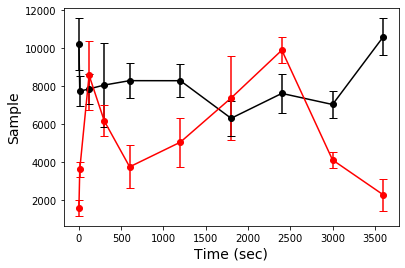

In [69]:
#Plot data
#This is useful in visualizing data
t=df1['Time']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x=t, y=mean_red, yerr=stderr_red, fmt='ko-', capsize=4, label='Pap(red)')
ax.errorbar(x=t, y=mean_ox, yerr=stderr_ox, fmt='ro-', capsize=4, label='Pap(ox)')
plt.ylabel(r'Sample', size=14)
plt.xlabel(r'Time (sec)', size=14)

#You can save figure as png, pdf etc. By adjusting the dpi, you can increase the resolution of your figure
#This would make it prettier for your thesis
fig.savefig('Figure 2.png', dpi=200)

## 2.4 Summary of your data

In [70]:
#create a dataframe of just the mean_red and mean_ox and std errors using the concatantion function
#This might be a more useful summary of your data

df_mean_data = pd.concat([df1['Time'], mean_red, mean_ox, stderr_red,stderr_ox ], keys=['Time', 'Red', 'Ox', 'stderr_red', 'stderr_ox'], axis=1)

In [71]:
df_mean_data

,Time,Red,Ox,stderr_red,stderr_ox
0,0,10215.554667,1582.103000,1366.879250,421.741261
1,10,7738.669000,3612.766667,796.931765,398.838889
2,120,7859.204333,8582.693000,775.733963,1822.944691
3,300,8062.743000,6168.373000,2215.149730,817.696748
4,600,8295.204667,3748.514333,919.908328,1132.710602
5,1200,8292.385667,5050.464000,871.019977,1290.718182
6,1800,6309.369333,7379.511000,938.723883,2216.232029
7,2400,7622.871333,9902.359333,1016.533690,682.200455
8,3000,7037.531000,4112.618667,707.860087,399.200389
9,3600,10609.417667,2273.066333,978.008961,853.837192


In [72]:
#Of course, you can plot this data too
#Note that I will call the columns directly out of the df_mean_data dataframe.

Text(0.5, 0, 'Time (sec)')

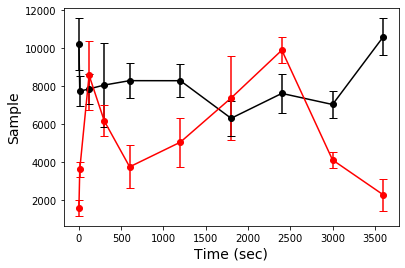

In [73]:
t=df_mean_data['Time']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x=t,y=df_mean_data['Red'], yerr=df_mean_data['stderr_red'], fmt='ko-', capsize=4, label='Reduced')
ax.errorbar(x=t,y=df_mean_data['Ox'], yerr=df_mean_data['stderr_ox'], fmt='ro-', capsize=4, label='Oxidized')
plt.ylabel(r'Sample', size=14)
plt.xlabel(r'Time (sec)', size=14)

## 2.5 Exporting your data

In [74]:
#Importing an excel spreadsheet everytime you want to check your data might be pain
#You can write your data to a csv fileor txt file which are more light-weight and user friendly
#Make sure to get the path correct; in this case the path is based on my computer
df_mean_data.to_csv(r'C:\Users\chepillay\Dropbox\Python scripts\sample1.csv', index=False)

In [75]:
#Lets call our csv file
df = pd.read_csv('sample1.csv')
df

,Time,Red,Ox,stderr_red,stderr_ox
0,0,10215.554667,1582.103000,1366.879250,421.741261
1,10,7738.669000,3612.766667,796.931765,398.838889
2,120,7859.204333,8582.693000,775.733963,1822.944691
3,300,8062.743000,6168.373000,2215.149730,817.696748
4,600,8295.204667,3748.514333,919.908328,1132.710602
5,1200,8292.385667,5050.464000,871.019977,1290.718182
6,1800,6309.369333,7379.511000,938.723883,2216.232029
7,2400,7622.871333,9902.359333,1016.533690,682.200455
8,3000,7037.531000,4112.618667,707.860087,399.200389
9,3600,10609.417667,2273.066333,978.008961,853.837192


Text(0.5, 0, 'Time (sec)')

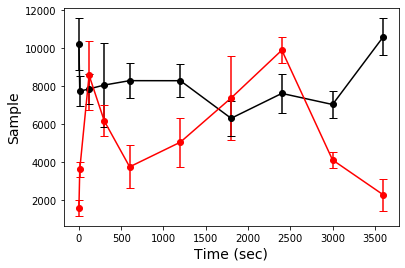

In [76]:
#Lets plot the data from our csv file
t=df['Time']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(x=t,y=df['Red'], yerr=df['stderr_red'], fmt='ko-', capsize=4, label='Reduced')
ax.errorbar(x=t,y=df['Ox'], yerr=df['stderr_ox'], fmt='ro-', capsize=4, label='Oxidized')
plt.ylabel(r'Sample', size=14)
plt.xlabel(r'Time (sec)', size=14)